<a href="https://colab.research.google.com/github/silviagraz/Exercise_FASTA_file/blob/silviagraz-patch-1/Script_Progetto_GenePPP2R2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Silvia Grazioli, Matricola 754714, A.A. 2021/2022
## Progetto d'esame di Bioinformatica, parte 1, Prof. Della Vedova  

A partire dai file `gene.txt` ed `ensembl.csv` che contengono, rispettivamente, 
- la regione genomica
- alcune informazioni relative al gene PPP2R2A,  

svolgere i seguenti punti:

1. Estrarre le sole **righe** con `gene_id` uguale a `ENSG00000221914.11`.  
2. Per ogni esone (le righe con `exon_idnon` mancante), costruire la **sequenza di nucleotidi**, sfruttando le coordinate start e end. Ad esempio, il primo esone ha coordinate start, end pari rispettivamente a 26291508, 26291826. Bisogna quindi estrarre la porzione di genoma dalla posizione 26291508 a 26291826, estremi inclusi. L'intestazione del file `gene.txt` riporta tre campi separati da spazi: il terzo campo contiene, fra gli altri valori, le posizioni di inizio e fine della porzione di genoma contenuto.  
3. Per ogni trascritto (identificato dal `transcript_id`), determinare la somma delle **lunghezze dei suoi esoni**.  
4. Determinare il trascritto che ha **massima lunghezza** calcolata al punto precedente.


---



# Gene *PPP2R2A* (Protein Phosphatase 2 Regulatory Subunit Balpha)  

This gene encodes a protein that is implicated in the control of **cell growth** and **division**. 

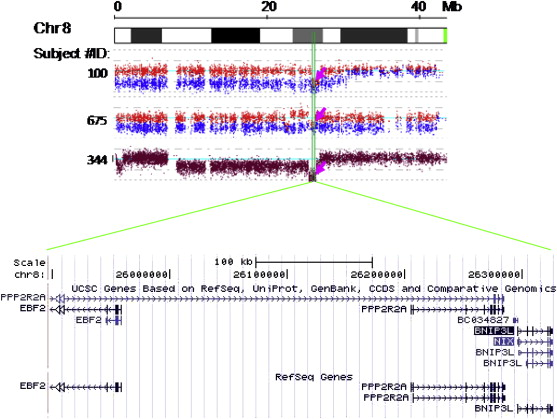



---



# 1) Operations on the `FASTA` file  

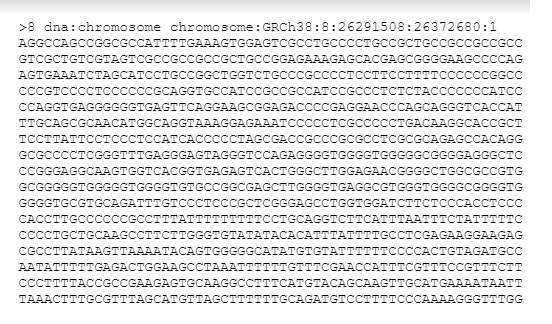

## a) File loading

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Loading the FASTA file
with open("/content/drive/MyDrive/BIOSTAT/Bioinformatica/Progetto_ProfDellaVedova/data/gene.txt") as f:
    content = f.readlines()

In [ ]:
# General file check
# content

### Some considerations

Since through a preliminary visual inspection of the file it resulted that it contains informations on just one gene, I'm not creating a dictionary (that would be more suitable for multiple genes) to work on the data.

## b) Saving the header

In [ ]:
# Saving the FASTA file header (that contains information on the gene);
# I'm splitting it using the ':' character so that I can save the values that I need.
header = content[0].split(':')
header

['>8 dna',
 'chromosome chromosome',
 'GRCh38',
 '8',
 '26291508',
 '26372680',
 '1\n']

In [ ]:
# Saving genome start and end positions
gene_start = int(header[-3])
gene_end = int(header[-2])

In [ ]:
# Saving the genome length
gene_length = gene_end - gene_start + 1
gene_length

81173

## c) Saving the gene content

In [ ]:
# Joining all the remaining lines (nucleotides sequence) and removing the \n characters
gene_content = ''.join(content[1:]).replace('\n', '')

In [ ]:
# Final gene check
# gene_content

## d) Deleting the objects that are no longer needed

In [ ]:
del f, content

# 2) Operations on the `.csv` file  

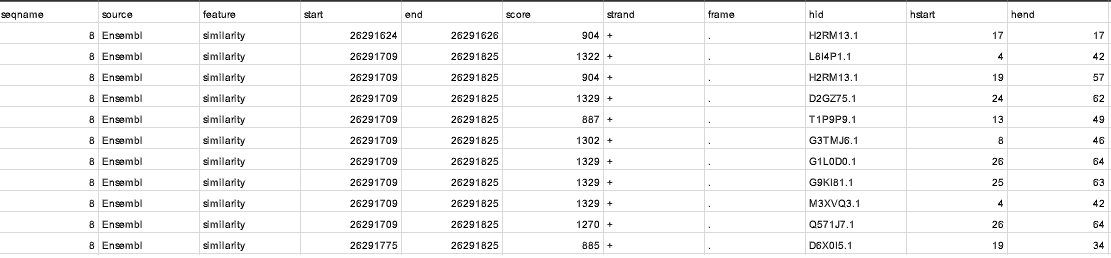

## a) File loading

In [ ]:
# Importing Pandas
import pandas as pd

In [ ]:
# Loading the file as a Pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/BIOSTAT/Bioinformatica/Progetto_ProfDellaVedova/data/ensembl.csv")

In [ ]:
# General data check
data

,seqname,source,feature,start,end,score,strand,frame,hid,hstart,hend,genscan,gene_id,transcript_id,exon_id,gene_type,variation_name,probe_name
0,8,Ensembl,similarity,26291624,26291626,904,+,.,H2RM13.1,17.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Ensembl,similarity,26291709,26291825,1322,+,.,L8I4P1.1,4.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,Ensembl,similarity,26291709,26291825,904,+,.,H2RM13.1,19.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Ensembl,similarity,26291709,26291825,1329,+,.,D2GZ75.1,24.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Ensembl,similarity,26291709,26291825,887,+,.,T1P9P9.1,13.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22243,8,Ensembl,gene,26360974,26361151,.,+,-1,NaN,NaN,NaN,NaN,gene-PPP2R2A.1,rna-XM_011544569.1.1,exon-XM_011544567.2-7,protein_coding,NaN,NaN
22244,8,Ensembl,gene,26362684,26362848,.,+,1,NaN,NaN,NaN,NaN,gene-PPP2R2A.1,rna-XM_011544569.1.1,exon-NM_002717.4-7,protein_coding,NaN,NaN
22245,8,Ensembl,gene,26363721,26363890,.,+,1,NaN,NaN,NaN,NaN,gene-PPP2R2A.1,rna-XM_011544569.1.1,exon-NM_002717.4-8,protein_coding,NaN,NaN
22246,8,Ensembl,gene,26366315,26366406,.,+,0,NaN,NaN,NaN,NaN,gene-PPP2R2A.1,rna-XM_011544569.1.1,exon-NM_002717.4-9,protein_coding,NaN,NaN


## b) Selecting rows where `gene_id = 'ENSG00000221914.11'`

In [ ]:
# I'm also resetting the indexes from 0 onwards
data = data.loc[data['gene_id'] == 'ENSG00000221914.11'].reset_index()
data.head(3)

,index,seqname,source,feature,start,end,score,strand,frame,hid,hstart,hend,genscan,gene_id,transcript_id,exon_id,gene_type,variation_name,probe_name
0,21846,8,Ensembl,gene,26291508,26291826,.,+,-1,NaN,NaN,NaN,NaN,ENSG00000221914.11,ENST00000380737.8,ENSE00002131643,protein_coding,NaN,NaN
1,21847,8,Ensembl,gene,26293666,26293740,.,+,1,NaN,NaN,NaN,NaN,ENSG00000221914.11,ENST00000380737.8,ENSE00003521886,protein_coding,NaN,NaN
2,21848,8,Ensembl,gene,26338890,26338987,.,+,1,NaN,NaN,NaN,NaN,ENSG00000221914.11,ENST00000380737.8,ENSE00003472689,protein_coding,NaN,NaN


## c) Creating the sequence of nucleotides for each row, where `exon_id` is not missing.  

Note that `start` and `end` variables contain the respective coordinates.

In [ ]:
# nucleotides_sequence: Creating an empty variable in the dataframe for saving the sequences of nucleotides.
# nucleotides_sequence_length: Creating an empty variable in the dataframe for saving the length of the sequences of nucleotides

data = data.assign(nucleotides_sequence='',
            nucleotides_sequence_length='')

In [ ]:
# For each row in the dataframe, I'm copying in the 'nucleotides_sequence' variable
# the respective nucleotide sequence that I got through the FASTA file.
# I'm also calculating its length.

for ind in data.index:
    data['nucleotides_sequence'][ind] = gene_content[ (int(data['start'][ind])-gene_start) : (int(data['end'][ind])-gene_start)]
    data['nucleotides_sequence_length'][ind] = len(data['nucleotides_sequence'][ind])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Check
data.head(3)

,index,seqname,source,feature,start,end,score,strand,frame,hid,...,hend,genscan,gene_id,transcript_id,exon_id,gene_type,variation_name,probe_name,nucleotides_sequence,nucleotides_sequence_length
0,21846,8,Ensembl,gene,26291508,26291826,.,+,-1,NaN,...,NaN,NaN,ENSG00000221914.11,ENST00000380737.8,ENSE00002131643,protein_coding,NaN,NaN,AGGCCAGCCGGCGCCATTTTGAAAGTGGAGTCGCCTGCCCCTGCCG...,318
1,21847,8,Ensembl,gene,26293666,26293740,.,+,1,NaN,...,NaN,NaN,ENSG00000221914.11,ENST00000380737.8,ENSE00003521886,protein_coding,NaN,NaN,GAGCTGGAGGAGGGAATGATATTCAGTGGTGTTTTTCTCAGGTGAA...,74
2,21848,8,Ensembl,gene,26338890,26338987,.,+,1,NaN,...,NaN,NaN,ENSG00000221914.11,ENST00000380737.8,ENSE00003472689,protein_coding,NaN,NaN,CAGATATAATTTCTACAGTAGAATTTAATCATTCTGGAGAATTACT...,97


## d) For each `transcript_id`, determine the lenght of the sum of the exons.

In [ ]:
# First, I'm creating a new dataframe to work on the unique values of transcript_id 
transcripts = pd.DataFrame(columns = ['transcripts_unique_names', 'length'])

In [ ]:
# Getting the unique values of transcript_id and saving it in the dataframe
transcripts['transcripts_unique_names'] = data.transcript_id.unique()

In [ ]:
transcripts.head(3)

,transcripts_unique_names,length
0,ENST00000380737.8,NaN
1,ENST00000518254.5,NaN
2,ENST00000520329.5,NaN


In [ ]:
# non funziona, controllare
for ind_a in transcripts.index:
  for ind_b in data.index:
    if transcripts['transcripts_unique_names'][ind_a] == data['transcript_id'][ind_b]:
      transcripts['length'][ind_a] += data['nucleotides_sequence_length'][ind_b]

## e) Determine which transcript is the longest.

In [ ]:
# qualcosa così
transcripts['transcripts_unique_names'].max(transcripts['length'])